Data attributes:

1. Admit: 0-not admitted, 1- admitted
2. gre: gre score
3. Gpa: Gpa score
4. Rank: School rank

You need to create a machine learning model if a student is admitted or not given attributes. 

1. Run logistic model and naive bayes. Compare the two results. Which one is better?
2. Create density plot of gre and gpa against admit.

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix   
%matplotlib inline

In [304]:
data=pd.read_csv('Education.csv')

In [305]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [306]:
data.shape

(400, 4)

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


<AxesSubplot:>

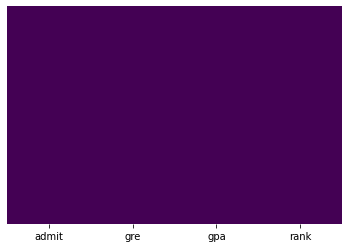

In [308]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [309]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


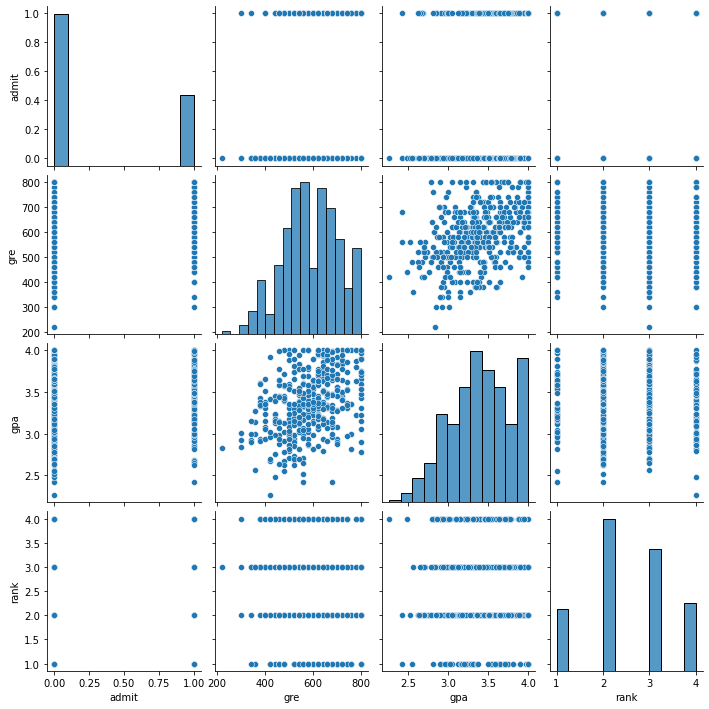

In [310]:
sns.pairplot(data)

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='admit', ylabel='count'>

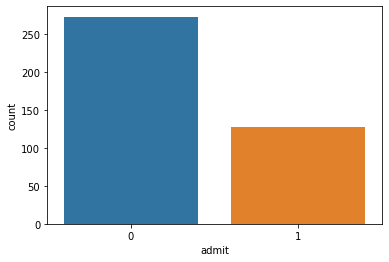

In [311]:
sns.countplot(data['admit']) 

<AxesSubplot:>

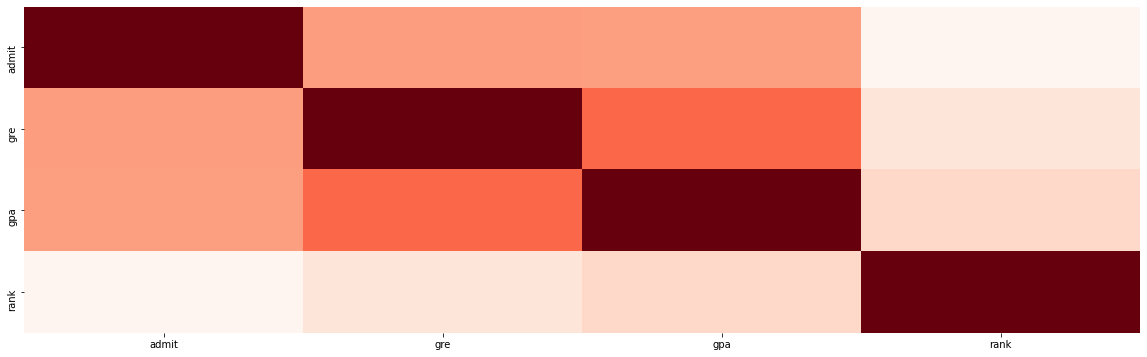

In [312]:
plt.figure(figsize=(20,6)) 
sns.heatmap(data.corr(), annot=False, cmap='Reds', cbar=False) 

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('admit',axis=1), 
                                                    data['admit'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
# Model building in logistic regression algorithm

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Determining training accuracy

In [318]:
predictions_train = logmodel.predict(X_train)

In [319]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       192
           1       0.61      0.22      0.32        88

    accuracy                           0.71       280
   macro avg       0.67      0.58      0.57       280
weighted avg       0.69      0.71      0.66       280



In [ ]:
# Determining test accuracy

In [320]:
predictions_test = logmodel.predict(X_test)

In [321]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        81
           1       0.62      0.21      0.31        39

    accuracy                           0.70       120
   macro avg       0.66      0.57      0.56       120
weighted avg       0.68      0.70      0.65       120



Actual      0  1
Predicted       
0          76  5
1          31  8


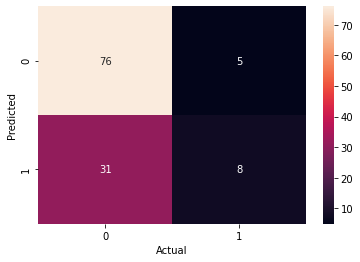

In [322]:
# Evaluating the confusion matrix
confusion_matrix = pd.crosstab(y_test,predictions_test, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

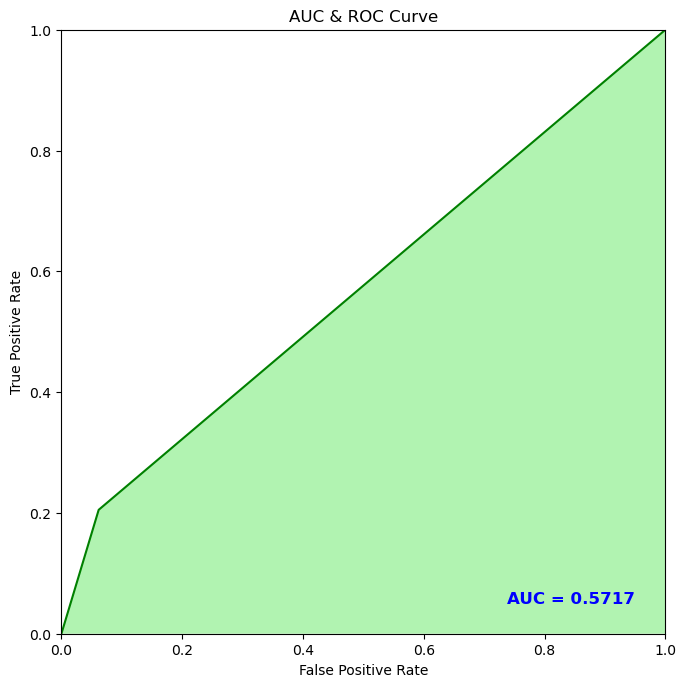

In [323]:
# Creating AUC & ROC curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_test)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



In [284]:
# Model building in naive bayes algorithm

In [324]:
from sklearn.naive_bayes import GaussianNB    
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Determining training accuracy

In [325]:
y_predict_train = NB_classifier.predict(X_train)


In [326]:

print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       192
           1       0.59      0.26      0.36        88

    accuracy                           0.71       280
   macro avg       0.66      0.59      0.59       280
weighted avg       0.69      0.71      0.67       280



In [ ]:
# Determining test accuracy

In [327]:
y_predict_test = NB_classifier.predict(X_test)

In [328]:

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        81
           1       0.65      0.33      0.44        39

    accuracy                           0.73       120
   macro avg       0.70      0.62      0.63       120
weighted avg       0.71      0.72      0.70       120



Actual      0   1
Predicted        
0          74   7
1          26  13


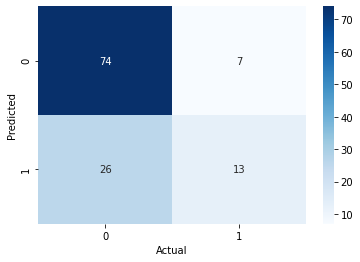

In [329]:
# Evaluating the confusion matrix
cm = pd.crosstab(y_test, y_predict_test,rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(cm, annot=True, cmap='Blues')
print(cm)

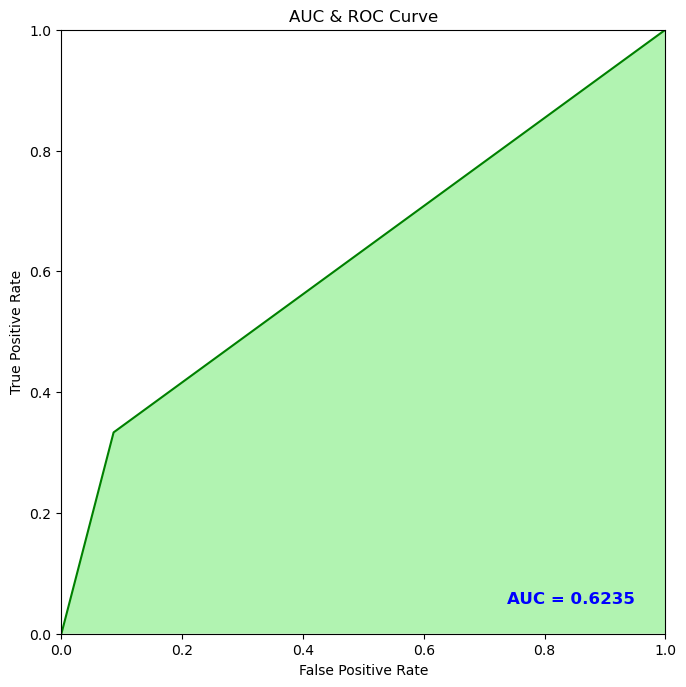

In [330]:
# Creating AUC & ROC curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_predict_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_predict_test)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# The AUC value in logistic regression is 0.5717 and in naive bayes is 0.6235
# So, we can say that naive bayes is better than logistic regression in this case.


Text(0.5, 1.0, 'GRE vs Admit')

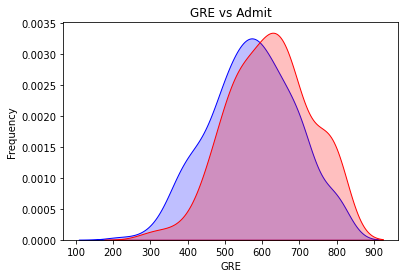

In [331]:
# Creating density plot of GRE against ADMIT 
fig, ax = plt.subplots()
ax = sns.kdeplot(data.loc[(data['admit'] == 0),'gre'], color='b',shade=True,label='not admitted')
ax = sns.kdeplot(data.loc[(data['admit'] == 1),'gre'], color='r',shade=True, label='admitted')
ax.set(xlabel='GRE', ylabel='Frequency')
plt.title('GRE vs Admit')

Text(0.5, 1.0, 'GPA vs Admit')

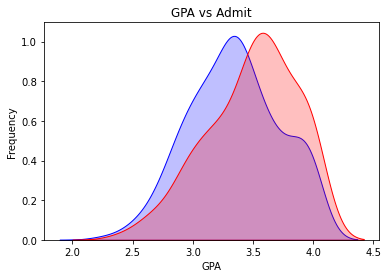

In [332]:
#Create density plot of GPA against ADMIT.

fig, ax = plt.subplots()
ax = sns.kdeplot(data.loc[(data['admit'] == 0),'gpa'], color='b',shade=True,label='not admitted')
ax = sns.kdeplot(data.loc[(data['admit'] == 1),'gpa'], color='r',shade=True, label='admitted')
ax.set(xlabel='GPA', ylabel='Frequency')
plt.title('GPA vs Admit')
